# Predicting Fraud Transaction using Machine Learning

In [4]:
#importing necessory libraries
import pandas as pd
import numpy as np

In [5]:
#Collecting the relevant data
data=pd.read_csv("Fraud.csv")

In [6]:
#displaying first 5 rows
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
#displaying last 5 rows
data.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## description of each column in the dataframe
<ul>
<li>step : Number of hours it took for a transaction to complete.</li>
<li>type : Type of transaction that took place. There are 5 categories in this column namely; ‘PAYMENT’, ‘TRANSFER’, ‘CASH_OUT’, ‘DEBIT’, ‘CASH_IN’ .</li>
<li>amount : Total amount of transaction</li>
<li>nameOrig : Name/ID of the Sender.</li>
<li>oldbalanceOrg: Sender balance before the transaction took place.</li>
<li>newbalanceOrg : Sender balance after the transaction took place.</li>
<li>nameDest : Name/ID of the Recipient.</li>
<li>oldbalanceDest : Recipient balance before the transaction took place.</li>
<li>newbalanceDest : Recipient balance after the transaction took place.</li>
<li>isFraud : This is the transaction made by the fraudulent agents inside the simulation.</li>
<li>isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200000 in a single transaction.</li>
</ul>


In [8]:
#checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.shape

(6362620, 11)

##### We can see above that the dataset contains a total of 11 columns and more than 6 million rows.

In [10]:
#checking the null values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#calculating the fraud count
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

###### It can be observed here that the dataset is highly imbalanced with 8213 Fraud cases and 6354407 non-Fraud cases.<i>Synthetic Minority Oversampling Technique (SMOTE)</i> or <i>Undersampling Techniques</i> can be used to resolve this issue.Undersampling is not used in real- world scenarios because it will lead to loss of data. Here, we are not dealing with the SMOTE for simplification.

In [10]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

#### Feature Engineering
###### With potentially hundreds or even thousands of features available, it is important to select the most relevant ones for training the machine learning model. Feature selection techniques, such as correlation analysis and feature importance ranking, help identify the features that contribute the most to fraud detection.

C:\Users\Dell\AppData\Local\Temp\ipykernel_36644\3530976599.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


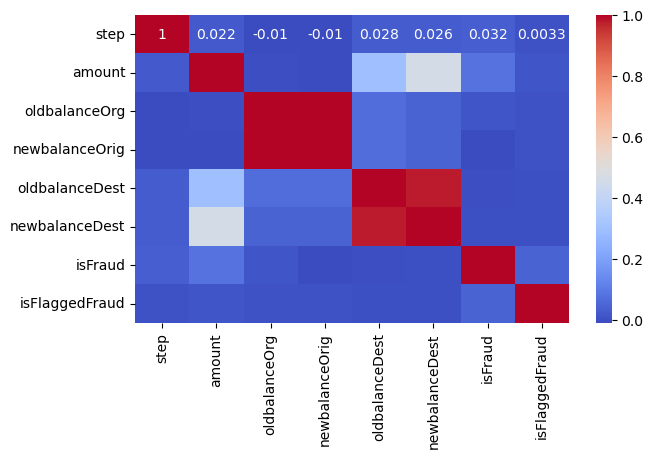

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Heatmaps are a powerful visual tool in machine learning, especially during feature selection.
<ol>
<li>Detecting Multicollinearit</li>>
<ul>Heatmaps of feature-to-feature correlations (e.g., using Pearson’s r) reveal highly correlated pairs.</ul>
<ul>If two features are strongly correlated (e.g., r > 0.9), one may be redundant and can be dropped to reduce model complexity.</u>
    
<li>Identifying Strong Predi</li></li>
<ul>By including the target variable in the correlation matrix, you can spot features with strong correlation to the target</ul>
<ul>These features are likely to be more predictive and worth keepinl>
  
</ol>
ping.



##### We see that there is very weak corelation between nameorig & nameDest so let us drop it.

In [24]:
data=data.drop(['nameOrig','nameDest'],axis=1)

In [25]:
#After Dropping our dataframe is:
data.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [29]:
#convert categorical labels into numerical values. 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])

##### To evaluate the performance of the model, it is necessary to split the dataset into training and testing sets.We use the training set to train the model.
###### We set our X variable by dropping the ‘isFraud’ column because that is our target column.
###### The ‘isFraud’ column is subsequently assigned to our y variable.

In [ ]:
X, y = data.loc[:, data.columns != 'isFraud'], data['isFraud']

In [33]:
#preparing data for machine learning
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [35]:
#Putting all the values on the same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
#training & testing using GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9955882953877491


In [38]:
##training & testing using LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9992070876462841
